In [1]:
# import packages
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

# import datasets
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')
submission = pd.read_csv('datasets/sample_solution.csv')

In [2]:
#trainの様子を見てみよう
train_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.108590,0.004314,-37.566000,0.017364,0.289150,-10.251000,135.120000,168900.000000,399240000000000.000000,86.489000,0.598810,1423200000.000000,0.272400,9.455600,-0.050305,1938.300000,8.633100,4.060700,26.867000,-1.180000,10961.000000,1.539700,135.320000,-1.496500,440.080000,2590100000000.000000,2194200000.000000,2968800.000000,0.001431,13.327000,0.750500,18509.000000,146820.000000,-0.000276,10906000000000000.000000,1705.400000,414.290000,3.539200,1888.000000,0.968930,18.388000,-0.001583,7.705900,5.932500,0.025693,4.560400,0.611220,10.795000,0.341930,0.235010,NaN,5237.700000,1.296100,163.660000,0.403780,0.188600,-0.001446,-0.354160,6.643200,0.305340,0.514020,1907300000.000000,29.861000,0.965010,1797.200000,72.178000,108.620000,1.979900,1.290700,0.995190,1.322800,827.340000,777990000000000.000000,41299000000.000000,0.006994,6.983500,43956.000000,1978.200000,5.508400,-0.001081,6.124400,123180000000.000000,275.920000,5308500.000000,1704.000000,50224000000.000000,53.398000,-2.201200,6871.000000,3.886200,-0.005580,5252.100000,166.690000,1.607400,0.665340,7768.900000,0.996620,112570000000.000000,2.243200,0.934160,0.650560,94569.000000,21.471000,8214.100000,0.288010,0.097826,0.001071,1412400000.000000,0.110930,-12.228000,1.748200,1.909600,-7.115700,4378.800000,1.209600,861340000000000.000000,140.100000,1.017700,1
1,1,0.100900,0.299610,11822.000000,0.276500,0.459700,-0.837330,1721.900000,119810.000000,3874100000000000.000000,9953.600000,1.209300,3334100000.000000,0.286310,-0.012858,-0.019912,10.284000,6.187200,1.041900,4.640400,31.877000,123620.000000,1.395100,125.810000,1.198900,136.450000,9098100000.000000,40041000000.000000,1564000.000000,0.000204,3.107400,1.503300,238000.000000,21440.000000,-0.001344,30794000000000000.000000,229.100000,844.820000,1.468000,4726.500000,0.915380,-1.532100,0.982600,7.111200,2.079700,0.042321,4.252300,0.418710,5.449900,0.012737,0.386470,7.308200,283.210000,-0.925520,140.800000,0.247390,-0.001656,-0.000975,-0.226290,2.424600,0.771470,0.011613,1803700000.000000,64.604000,0.262650,4455.000000,78.339000,745.510000,2.906900,1.482600,1.005100,1.497400,84.446000,3505600000000000.000000,2242300000.000000,0.896300,4.674900,17713.000000,9003.100000,-4.354600,0.254100,6.919100,183240000000.000000,9.651000,32800.000000,1480.600000,23006000000.000000,44.051000,205.690000,4295.300000,13.388000,0.468430,754.610000,83.233000,1.189000,29.550000,7343.700000,0.998150,48777000000000.000000,1.270800,-0.000969,5.295200,6779.000000,227.720000,34.342000,0.340300,0.143370,0.049276,1903200000.000000,0.976730,-56.758000,4.168400,0.348080,4.142000,913.230000,1.246400,7575100000000000.000000,1861.000000,0.283590,0
2,2,0.178030,-0.006980,907.270000,0.272140,0.459480,0.173270,2298.000000,360650.000000,12245000000000.000000,15827.000000,0.381640,1230300000.000000,0.258070,2.455600,NaN,26.873000,7.546300,1.996700,1.952600,817.760000,-2948.700000,2.005400,1.682600,1.196800,74.624000,-32739000000.000000,57189000000.000000,11058.000000,-0.003097,8.024100,1.131800,27940.000000,862460.000000,-0.002207,58491000000000.000000,-897.840000,NaN,1.356100,3063.400000,0.086232,16.106000,0.001481,11.476000,5.343000,0.012162,4.101800,-0.882700,8.122800,-0.676690,0.337700,-1.073200,4097.000000,13.458000,159.240000,0.322300,0.560090,0.000455,-0.160830,3.575300,0.609700,0.028301,527130000.000000,14.454000,0.115490,14605.000000,36.992000,-9.639100,64.267000,NaN,0.992780,2.589100,430.400000,-44535000000000.000000,5144900000000.000000,0.099591,6.551600,1887.500000,43319.

In [2]:
#idカラムは不要なので削除
train_df = train_df.drop(columns=['id'])

In [3]:
missing_train_df = pd.DataFrame(train_df.isna().sum())
missing_train_df = missing_train_df.drop(['claim']).reset_index()
missing_train_df.columns= ['feature', 'count']
missing_train_df

,feature,count
0,f1,15247
1,f2,15190
2,f3,15491
3,f4,15560
4,f5,15405
5,f6,15521
6,f7,15504
7,f8,15373
8,f9,15249
9,f10,15223


In [4]:
missing_train_df['percent'] = missing_train_df['count']/train_df.shape[0]
missing_train_df

,feature,count,percent
0,f1,15247,0.015917
1,f2,15190,0.015857
2,f3,15491,0.016172
3,f4,15560,0.016244
4,f5,15405,0.016082
5,f6,15521,0.016203
6,f7,15504,0.016185
7,f8,15373,0.016048
8,f9,15249,0.015919
9,f10,15223,0.015892


In [5]:
missing_train_percent_df = missing_train_df.copy()
missing_train_percent_df['count'] = missing_train_df['count']/train_df.shape[0]
missing_train_percent_df

,feature,count,percent
0,f1,0.015917,0.015917
1,f2,0.015857,0.015857
2,f3,0.016172,0.016172
3,f4,0.016244,0.016244
4,f5,0.016082,0.016082
5,f6,0.016203,0.016203
6,f7,0.016185,0.016185
7,f8,0.016048,0.016048
8,f9,0.015919,0.015919
9,f10,0.015892,0.015892


In [6]:
missing_test_df = pd.DataFrame(test_df.isna().sum())
missing_test_df = missing_test_df.drop(['id']).reset_index()
missing_test_df.columns= ['feature', 'count']
missing_test_percent_df = missing_test_df.copy()
missing_test_percent_df['count'] = missing_test_df['count']/test_df.shape[0]

In [38]:
features = [feature for feature in train_df.columns if feature not in ['claim']]

In [40]:
#行方向に欠損がいくつあるか
missing_train_row = train_df[features].isna().sum(axis=1)
missing_train_row = pd.DataFrame(missing_train_row.value_counts()/train_df.shape[0]).reset_index()
missing_train_row.columns = ['no', 'count']

In [41]:
missing_test_row = test_df[features].isna().sum(axis=1)
missing_test_row = pd.DataFrame(missing_test_row.value_counts()/test_df.shape[0]).reset_index()
missing_test_row.columns = ['no', 'count']

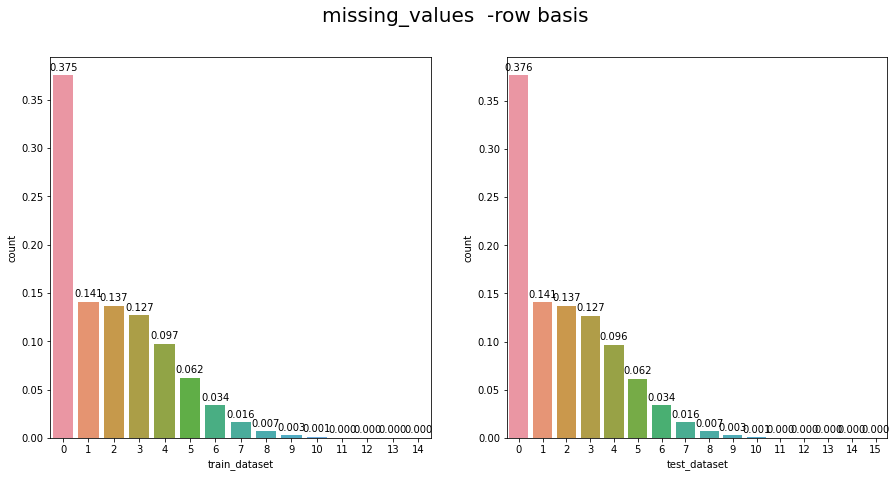

In [42]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.barplot(missing_train_row['no'], missing_train_row['count'], ax=ax[0])
plt.suptitle('missing_values  -row basis' , fontsize=20)
ax[0].set_xlabel('train_dataset')
for l, dx, dy in zip(missing_train_row['count'], missing_train_row['no'], missing_train_row['count']):
    plt.subplot(1,2,1)
    plt.annotate(text='{:.3f}'.format(l), xy=(dx, dy+0.005), ha='center')

sns.barplot(missing_test_row['no'], missing_test_row['count'], ax=ax[1])
ax[1].set_xlabel('test_dataset')    
for l, dx, dy in zip(missing_test_row['count'], missing_test_row['no'], missing_test_row['count']):
    plt.subplot(1,2,2)
    plt.annotate(text='{:.3f}'.format(l), xy=(dx, dy+0.005), ha='center')


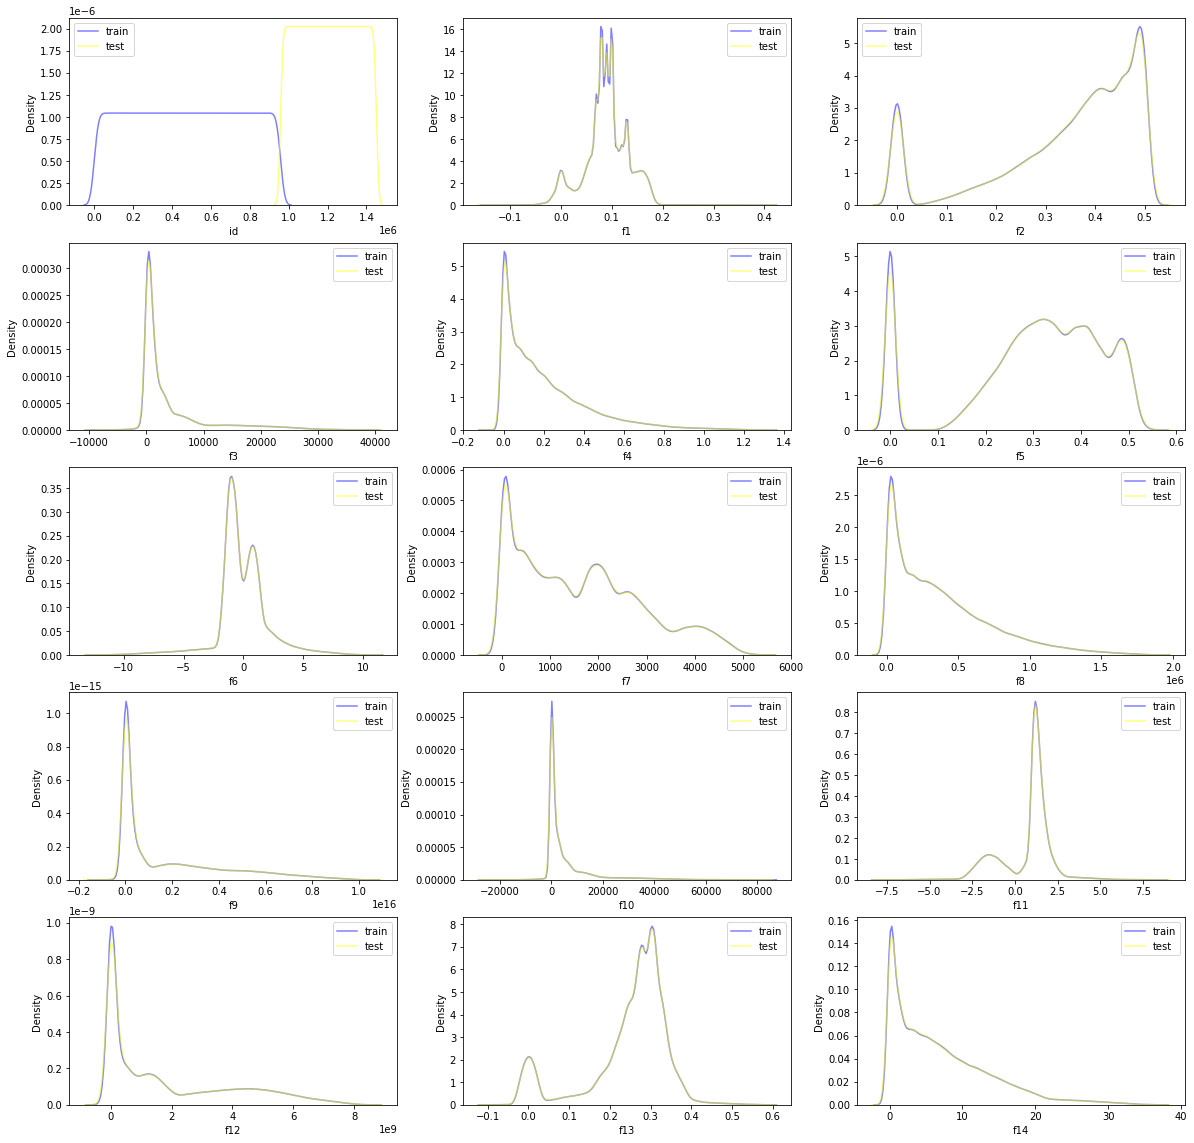

In [11]:
fig,ax = plt.subplots(5, 3, figsize=(20,20))

i = 1
for feature in train_df.columns[:15]:
    plt.subplot(5,3,i)
    ax = sns.kdeplot(train_df[feature], shade=False, color='blue',  alpha=0.5, label='train')
    ax = sns.kdeplot(test_df[feature], shade=False, color='yellow',  alpha=0.5, label='test')
    plt.xlabel(feature)
    plt.legend()
    i += 1
plt.show()

In [7]:
X_train = train_df.drop(columns=['claim'])
X_train['sum'] = X_train.sum(axis=1)
y_train = train_df[['claim']]

In [8]:
y_train.head()

,claim
0,1
1,0
2,1
3,1
4,1


In [9]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [10]:
X_train.shape, y_train.shape

((957919, 119), (957919, 1))

In [58]:
#LightGBMで予測してみよう
train_oof = np.zeros((X_train.shape[0],)) #格納するアレイを作る
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
for fold, (train_idx, valid_idx) in enumerate(skf.split(X_train, y_train)):
    X_train_oof = X_train.iloc[train_idx,:]
    X_valid_oof = X_train.iloc[valid_idx,:]
    y_train_oof = y_train.iloc[train_idx,:]
    y_valid_oof = y_valid.iloc[valid_idx,:]

    model = LGBMClassifier(random_state=27)
    
    model = model.fit(X_train_oof, y_train_oof)
    
    temp_oof = model.predict_proba(X_valid_oof)[:,1]
    train_oof[valid_idx] = temp_oof
    
    print('fold:{}--auc:{}'.format(fold, roc_auc_score(y_valid_oof, temp_oof)))

IndexingError: Too many indexers

In [60]:
X_train.shape, y_train.shape

((957919, 119), (957919, 1))

In [11]:
model = LGBMClassifier(random_state=27)
model = model.fit(X_train, y_train)

In [ ]:
X_test = test_df.copy()

In [69]:
X_test = X_test.drop(columns=['id'])
X_test['sum'] = X_test.sum(axis=1)
X_test.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,sum
0,0.165850,0.487050,1295.000000,0.023100,0.319000,0.901880,573.290000,3743.700000,2705700000000.000000,6221.000000,1.172000,5175000000.000000,0.258310,3.420500,0.044983,1001.600000,10.104000,10.536000,19.517000,-1.120900,1577.600000,2.184700,96.109000,1.153500,95.865000,2847100000000.000000,96421000000.000000,6406000.000000,0.002990,6.635300,-0.015913,21723.000000,67604.000000,-0.000227,60462000000000000.000000,203.580000,301.790000,1.346100,5524.600000,-0.003163,21.883000,0.027383,7.211300,24.825000,-0.001420,4.895000,-1.087100,7.056100,-1.061500,0.000100,1.856000,449.990000,-0.362860,160.630000,0.248010,0.623000,0.000116,-0.393840,1.903800,0.068588,0.020439,2506500000.000000,48.164000,-0.002272,78643.000000,112.360000,1021.900000,11.481000,1.157300,0.002995,1.819200,1096.800000,300410000000000.000000,2042300000.000000,0.085500,4.631200,1683.100000,9833.600000,NaN,0.510410,4.032200,247790000000.000000,69.264000,5494800.000000,1239.000000,534930000.000000,5.308600,182.590000,829.170000,5.231900,0.010301,3640.800000,112.120000,-0.434420,11.161000,3755.700000,0.999260,53382000000.000000,1.386700,-0.001878,58.794000,75657.000000,187.240000,1258.900000,0.163340,0.055398,0.020002,795640000.000000,0.162530,-22.189000,2.065500,0.430880,-10.741000,81606.000000,1.194000,198040000000000.000000,2017.100000,0.463570,60966411459644568.000000
1,0.129650,0.373480,1763.000000,0.728840,0.332470,-1.263100,875.550000,554370.000000,595570000000000.000000,934.430000,1.897900,4905100000.000000,0.284710,2.138700,-0.034328,35.223000,6.587300,12.734000,29.590000,4.163900,31915.000000,3.115800,109.430000,-0.852200,991.370000,4700100000.000000,1618200000000.000000,967810.000000,1.021500,2.961700,0.810310,415570.000000,384720.000000,0.002243,6712900000000000.000000,228.590000,33.952000,1.493800,2067.500000,-0.002343,32.772000,0.092283,6.536300,2.077300,0.046237,4.459000,-0.840920,4.447300,-1.001200,0.003750,99.647000,8146.800000,22.504000,153.400000,0.430760,0.743010,-0.000047,-0.116920,1.654400,0.467440,0.129650,444280000.000000,38.506000,0.396220,74296.000000,93.629000,-15.691000,30.655000,1.231100,1.004400,2.248400,780.870000,121360000000000.000000,348820000000.000000,-0.000792,6.999300,2451.600000,10483.000000,-5.354400,0.067286,5.404400,246260000000.000000,810.300000,860670.000000,2165.200000,271150000.000000,10.232000,515.410000,262.710000,5.635700,0.374220,420.160000,116.230000,1.269800,0.786190,1207.000000,1.000700,20650000000000.000000,1.288800,0.248850,9.985700,16323.000000,244.460000,647.580000,0.253820,0.008800,0.018479,112060000.000000,0.815280,-1.634200,1.573600,-1.071200,11.832000,90114.000000,1.150700,43880000000000000.000000,6638.900000,0.281250,51332703716128312.000000
2,0.120190,0.445210,736.260000,0.046150,0.296050,0.316650,2659.500000,317140.000000,397780000000000.000000,131.810000,-0.484040,3800000.000000,0.371730,0.402450,0.015119,1991.600000,6.005000,0.991900,11.949000,888.070000,887.700000,3.523700,108.140000,-1.654200,528.140000,2463600000000.000000,9005900000.000000,7259.300000,1.007400,2.612300,1.062500,-208010.000000,65708.000000,0.001391,81298000000000.000000,-84.032000,NaN,1.755600,4729.200000,0.003527,861.660000,0.902670,9.393400,58.785000,0.007244,5.664500,-0.627470,6.580600,-1.128200,0.386500,56.547000,125.360000,12.703000,147.380000,0.414370,0.519980,0.000857,-0.120650,5.411500,0.772530,0.128850,5664900000.000000,50.894000,0.378710,80045.000000,65.224000,780.210000,14.125000,1.165700,-0.001285,1.066300,432.010000,-595310000000.000000,13834000

In [71]:
y_pred = model.predict_proba(X_test)[:,1]

In [75]:
submission.head()

,id,claim
0,957919,0.500000
1,957920,0.500000
2,957921,0.500000
3,957922,0.500000
4,957923,0.500000


In [76]:
submission['claim'] = y_pred
submission.to_csv('submission_2.csv', index=False)

In [20]:
X_test['multi'] = X_test.sum(axis=1)
X_test.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,multi
0,0.165850,0.487050,1295.000000,0.023100,0.319000,0.901880,573.290000,3743.700000,2705700000000.000000,6221.000000,1.172000,5175000000.000000,0.258310,3.420500,0.044983,1001.600000,10.104000,10.536000,19.517000,-1.120900,1577.600000,2.184700,96.109000,1.153500,95.865000,2847100000000.000000,96421000000.000000,6406000.000000,0.002990,6.635300,-0.015913,21723.000000,67604.000000,-0.000227,60462000000000000.000000,203.580000,301.790000,1.346100,5524.600000,-0.003163,21.883000,0.027383,7.211300,24.825000,-0.001420,4.895000,-1.087100,7.056100,-1.061500,0.000100,1.856000,449.990000,-0.362860,160.630000,0.248010,0.623000,0.000116,-0.393840,1.903800,0.068588,0.020439,2506500000.000000,48.164000,-0.002272,78643.000000,112.360000,1021.900000,11.481000,1.157300,0.002995,1.819200,1096.800000,300410000000000.000000,2042300000.000000,0.085500,4.631200,1683.100000,9833.600000,NaN,0.510410,4.032200,247790000000.000000,69.264000,5494800.000000,1239.000000,534930000.000000,5.308600,182.590000,829.170000,5.231900,0.010301,3640.800000,112.120000,-0.434420,11.161000,3755.700000,0.999260,53382000000.000000,1.386700,-0.001878,58.794000,75657.000000,187.240000,1258.900000,0.163340,0.055398,0.020002,795640000.000000,0.162530,-22.189000,2.065500,0.430880,-10.741000,81606.000000,1.194000,198040000000000.000000,2017.100000,0.463570,60966411459644568.000000
1,0.129650,0.373480,1763.000000,0.728840,0.332470,-1.263100,875.550000,554370.000000,595570000000000.000000,934.430000,1.897900,4905100000.000000,0.284710,2.138700,-0.034328,35.223000,6.587300,12.734000,29.590000,4.163900,31915.000000,3.115800,109.430000,-0.852200,991.370000,4700100000.000000,1618200000000.000000,967810.000000,1.021500,2.961700,0.810310,415570.000000,384720.000000,0.002243,6712900000000000.000000,228.590000,33.952000,1.493800,2067.500000,-0.002343,32.772000,0.092283,6.536300,2.077300,0.046237,4.459000,-0.840920,4.447300,-1.001200,0.003750,99.647000,8146.800000,22.504000,153.400000,0.430760,0.743010,-0.000047,-0.116920,1.654400,0.467440,0.129650,444280000.000000,38.506000,0.396220,74296.000000,93.629000,-15.691000,30.655000,1.231100,1.004400,2.248400,780.870000,121360000000000.000000,348820000000.000000,-0.000792,6.999300,2451.600000,10483.000000,-5.354400,0.067286,5.404400,246260000000.000000,810.300000,860670.000000,2165.200000,271150000.000000,10.232000,515.410000,262.710000,5.635700,0.374220,420.160000,116.230000,1.269800,0.786190,1207.000000,1.000700,20650000000000.000000,1.288800,0.248850,9.985700,16323.000000,244.460000,647.580000,0.253820,0.008800,0.018479,112060000.000000,0.815280,-1.634200,1.573600,-1.071200,11.832000,90114.000000,1.150700,43880000000000000.000000,6638.900000,0.281250,51332703716128312.000000
2,0.120190,0.445210,736.260000,0.046150,0.296050,0.316650,2659.500000,317140.000000,397780000000000.000000,131.810000,-0.484040,3800000.000000,0.371730,0.402450,0.015119,1991.600000,6.005000,0.991900,11.949000,888.070000,887.700000,3.523700,108.140000,-1.654200,528.140000,2463600000000.000000,9005900000.000000,7259.300000,1.007400,2.612300,1.062500,-208010.000000,65708.000000,0.001391,81298000000000.000000,-84.032000,NaN,1.755600,4729.200000,0.003527,861.660000,0.902670,9.393400,58.785000,0.007244,5.664500,-0.627470,6.580600,-1.128200,0.386500,56.547000,125.360000,12.703000,147.380000,0.414370,0.519980,0.000857,-0.120650,5.411500,0.772530,0.128850,5664900000.000000,50.894000,0.378710,80045.000000,65.224000,780.210000,14.125000,1.165700,-0.001285,1.066300,432.010000,-595310000000.000000,138340

In [21]:
y_test = test_df.copy()
y_test.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.000000,0.023100,0.319000,0.901880,573.290000,3743.700000,2705700000000.000000,6221.000000,1.172000,5175000000.000000,0.258310,3.420500,0.044983,1001.600000,10.104000,10.536000,19.517000,-1.120900,1577.600000,2.184700,96.109000,1.153500,95.865000,2847100000000.000000,96421000000.000000,6406000.000000,0.002990,6.635300,-0.015913,21723.000000,67604.000000,-0.000227,60462000000000000.000000,203.580000,301.790000,1.346100,5524.600000,-0.003163,21.883000,0.027383,7.211300,24.825000,-0.001420,4.895000,-1.087100,7.056100,-1.061500,0.000100,1.856000,449.990000,-0.362860,160.630000,0.248010,0.623000,0.000116,-0.393840,1.903800,0.068588,0.020439,2506500000.000000,48.164000,-0.002272,78643.000000,112.360000,1021.900000,11.481000,1.157300,0.002995,1.819200,1096.800000,300410000000000.000000,2042300000.000000,0.085500,4.631200,1683.100000,9833.600000,NaN,0.510410,4.032200,247790000000.000000,69.264000,5494800.000000,1239.000000,534930000.000000,5.308600,182.590000,829.170000,5.231900,0.010301,3640.800000,112.120000,-0.434420,11.161000,3755.700000,0.999260,53382000000.000000,1.386700,-0.001878,58.794000,75657.000000,187.240000,1258.900000,0.163340,0.055398,0.020002,795640000.000000,0.162530,-22.189000,2.065500,0.430880,-10.741000,81606.000000,1.194000,198040000000000.000000,2017.100000,0.463570
1,957920,0.129650,0.373480,1763.000000,0.728840,0.332470,-1.263100,875.550000,554370.000000,595570000000000.000000,934.430000,1.897900,4905100000.000000,0.284710,2.138700,-0.034328,35.223000,6.587300,12.734000,29.590000,4.163900,31915.000000,3.115800,109.430000,-0.852200,991.370000,4700100000.000000,1618200000000.000000,967810.000000,1.021500,2.961700,0.810310,415570.000000,384720.000000,0.002243,6712900000000000.000000,228.590000,33.952000,1.493800,2067.500000,-0.002343,32.772000,0.092283,6.536300,2.077300,0.046237,4.459000,-0.840920,4.447300,-1.001200,0.003750,99.647000,8146.800000,22.504000,153.400000,0.430760,0.743010,-0.000047,-0.116920,1.654400,0.467440,0.129650,444280000.000000,38.506000,0.396220,74296.000000,93.629000,-15.691000,30.655000,1.231100,1.004400,2.248400,780.870000,121360000000000.000000,348820000000.000000,-0.000792,6.999300,2451.600000,10483.000000,-5.354400,0.067286,5.404400,246260000000.000000,810.300000,860670.000000,2165.200000,271150000.000000,10.232000,515.410000,262.710000,5.635700,0.374220,420.160000,116.230000,1.269800,0.786190,1207.000000,1.000700,20650000000000.000000,1.288800,0.248850,9.985700,16323.000000,244.460000,647.580000,0.253820,0.008800,0.018479,112060000.000000,0.815280,-1.634200,1.573600,-1.071200,11.832000,90114.000000,1.150700,43880000000000000.000000,6638.900000,0.281250
2,957921,0.120190,0.445210,736.260000,0.046150,0.296050,0.316650,2659.500000,317140.000000,397780000000000.000000,131.810000,-0.484040,3800000.000000,0.371730,0.402450,0.015119,1991.600000,6.005000,0.991900,11.949000,888.070000,887.700000,3.523700,108.140000,-1.654200,528.140000,2463600000000.000000,9005900000.000000,7259.300000,1.007400,2.612300,1.062500,-208010.000000,65708.000000,0.001391,81298000000000.000000,-84.032000,NaN,1.755600,4729.200000,0.003527,861.660000,0.902670,9.393400,58.785000,0.007244,5.664500,-0.627470,6.580600,-1.128200,0.386500,56.547000,125.360000,12.703000,147.380000,0.414370,0.519980,0.000857,-0.120650,5.411500,0.772530,0.128850,5664900000.000000,50.894000,0.378710,80045.000000,65.224000,780.210000,14.125000,1.165700,-0.001285,1.066300,432.010000,-595310000000.000000,1383400000000.000000,-0.006236,5.60520

In [22]:
X_train['multi'] = X_train.sum(axis=1)

In [77]:
y_train_pred = model.predict(X_train)

In [78]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [79]:
accuracy_score(y_train, y_train_pred)

0.7502983028836467

In [80]:
recall_score(y_train, y_train_pred)

0.7356522831743505

In [81]:
precision_score(y_train, y_train_pred)

0.7566736815803589

In [82]:
f1_score(y_train, y_train_pred)

0.7460149251829546

In [ ]:
y_train == y_train_pred